<a href="https://colab.research.google.com/github/Gaurav-Bindal/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_1_Gaurav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Loading the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(style="whitegrid")

In [2]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the Hotel booking dataset
bike_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project 2_Bike Renting/SeoulBikeData.csv', encoding = 'latin')

In [4]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
bike_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
bike_df.shape

(8760, 14)

In [9]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [10]:
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [11]:
#changing column name and removing units name from all columns 
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [12]:
bike_df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [13]:
bike_df.corr()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
Rented_Bike_Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind_speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew_point_temperature,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar_Radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


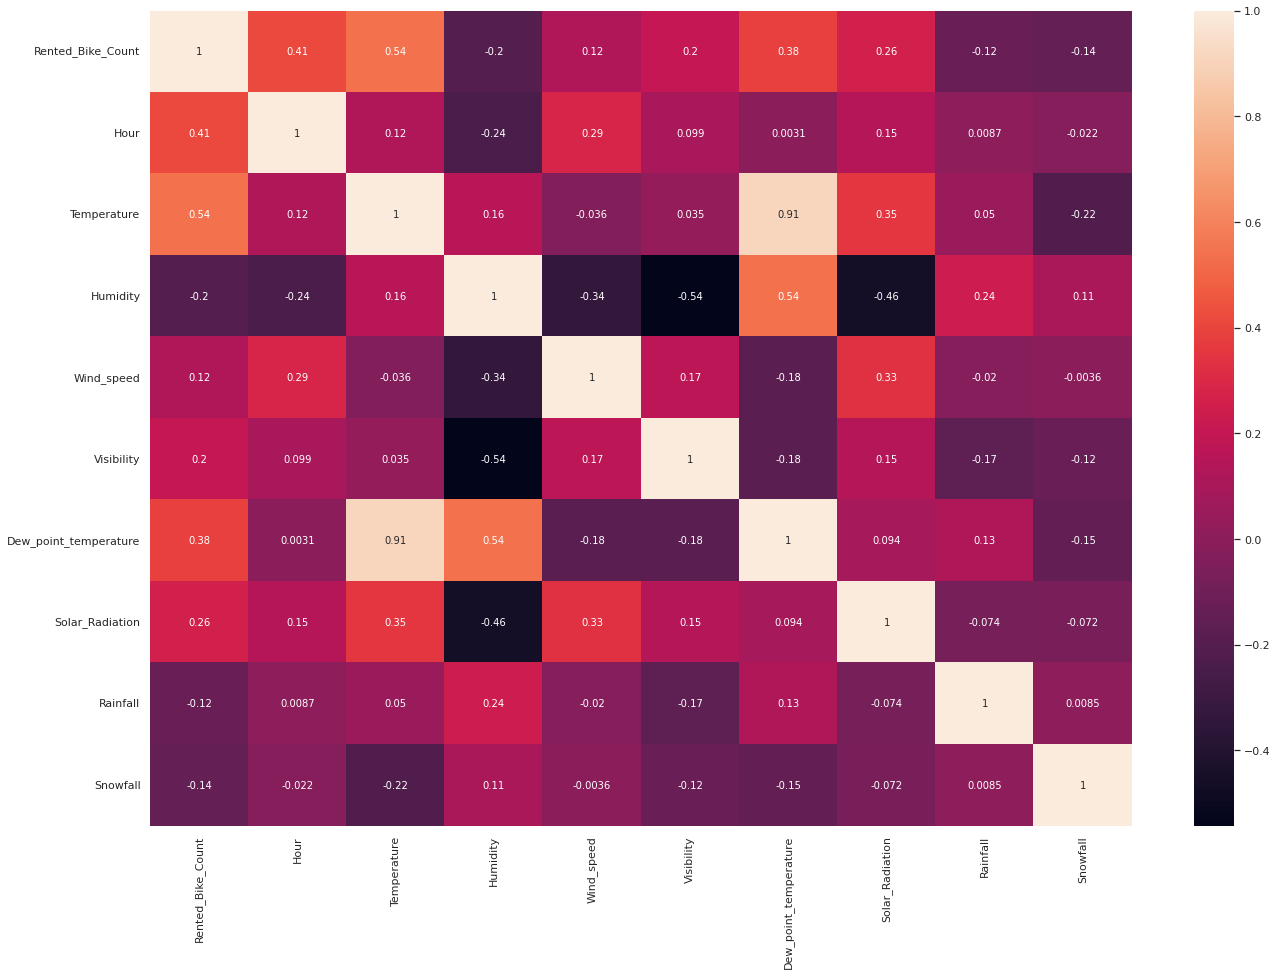

In [14]:
## Plot the heatmap to see correlation with columns
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(bike_df.corr(), annot=True, ax=ax);

Text(0, 0.5, 'no of bikes rented')

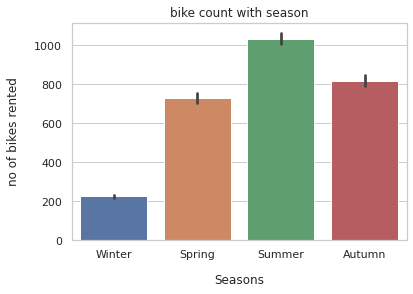

In [15]:
# Bar plot of bike count with season
sns.barplot(x='Seasons', y='Rented_Bike_Count', data=bike_df).set_title ('bike count with season')
plt.xlabel("Seasons", labelpad=14)
plt.ylabel("no of bikes rented", labelpad=14)

Text(0, 0.5, 'no of bikes rented')

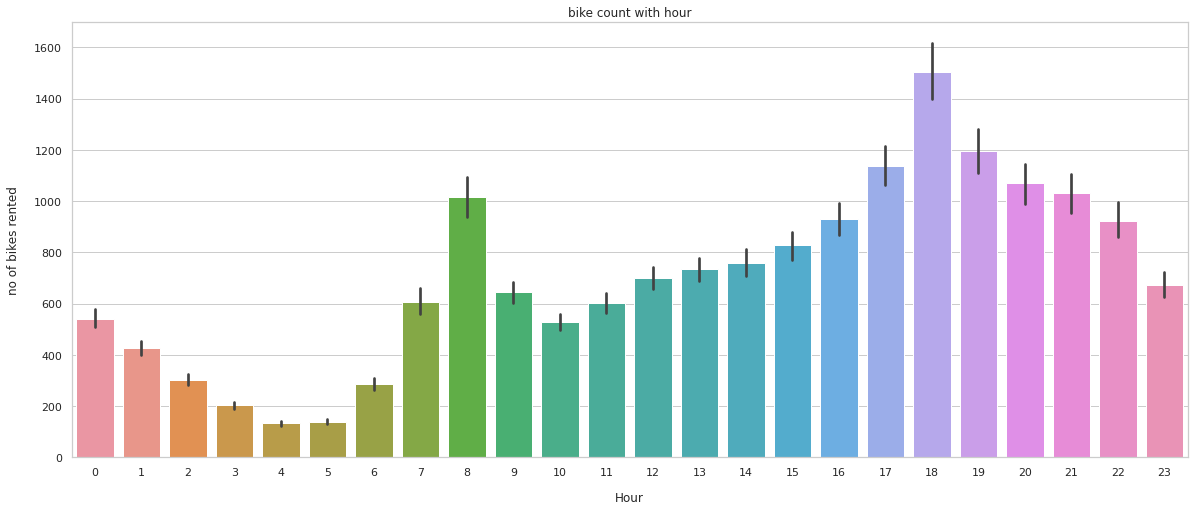

In [16]:
# Bar plot of bike count per hour
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(x='Hour', y='Rented_Bike_Count', data=bike_df).set_title ('bike count with hour')
plt.xlabel("Hour", labelpad=14)
plt.ylabel("no of bikes rented", labelpad=14)

Text(0, 0.5, 'no of bikes rented')

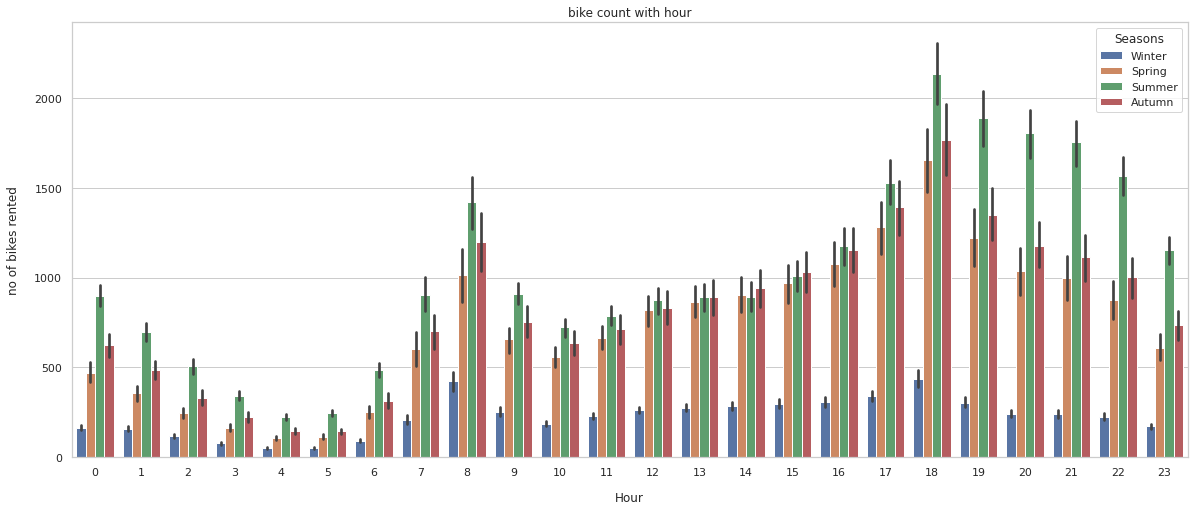

In [17]:
# Bar plot of bike count per hour
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(x='Hour', y='Rented_Bike_Count', data=bike_df, hue='Seasons').set_title ('bike count with hour')
plt.xlabel("Hour", labelpad=14)
plt.ylabel("no of bikes rented", labelpad=14)

Text(0, 0.5, 'no of bikes rented')

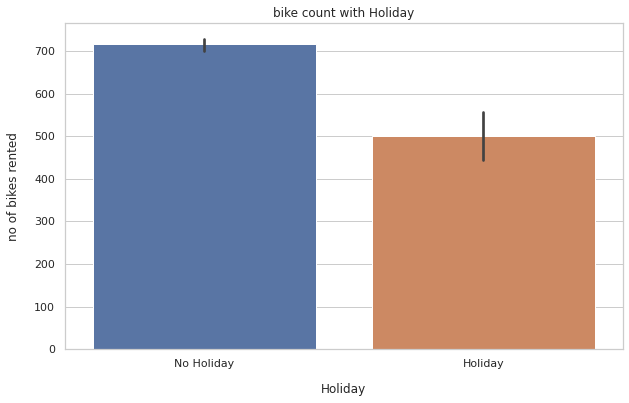

In [18]:
# Bar plot of bike count per hour
fig,ax=plt.subplots(figsize=(10,6))
sns.barplot(x='Holiday', y='Rented_Bike_Count', data=bike_df).set_title ('bike count with Holiday')
plt.xlabel("Holiday", labelpad=14)
plt.ylabel("no of bikes rented", labelpad=14)

Text(0, 0.5, 'no of bikes rented')

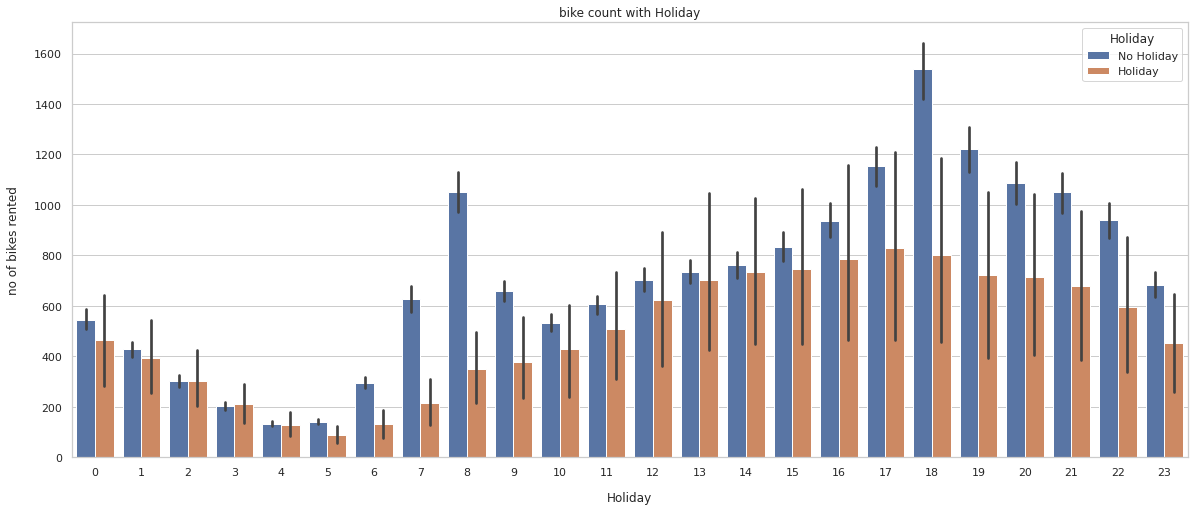

In [19]:
# Bar plot of bike count per hour
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(x='Hour', y='Rented_Bike_Count', data=bike_df, hue = 'Holiday').set_title ('bike count with Holiday')
plt.xlabel("Holiday", labelpad=14)
plt.ylabel("no of bikes rented", labelpad=14)

In [29]:
#bike_df.drop('No_Holiday', axis=1, inplace = True)

In [22]:
# Extracting 
bike_df['year'] = pd.DatetimeIndex(bike_df['Date']).year
bike_df['month'] = pd.DatetimeIndex(bike_df['Date']).month
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1


Text(0, 0.5, 'no of bikes rented')

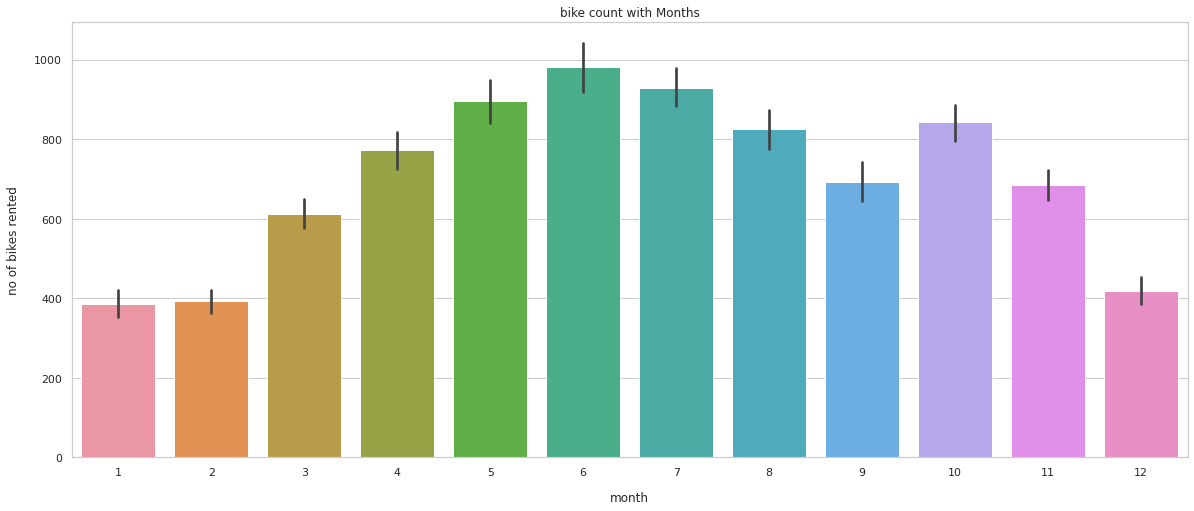

In [23]:
# Bar plot of bike count per hour
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(x='month', y='Rented_Bike_Count', data=bike_df).set_title ('bike count with Months')
plt.xlabel("month", labelpad=14)
plt.ylabel("no of bikes rented", labelpad=14)

In [24]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
from scipy import stats

In [25]:
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1


In [26]:
bike_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [31]:
# Create dummy variables for the catgeorical variable State
bike_df['Holiday'] = np.where(bike_df['Holiday']=='No Holiday', 0, 1)
bike_df['Functioning_Day_numeral'] = np.where(bike_df['Functioning_Day']=='Yes', 1, 0)

In [32]:
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,Functioning_Day_numeral
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,2017,1,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,2017,1,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,Yes,2017,1,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,Yes,2017,1,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,Yes,2017,1,1


In [33]:
# Create dummy variables for the catgeorical variable Season
bike_df['winter_season'] = np.where(bike_df['Seasons']=='Winter', 1, 0)
bike_df['spring_season'] = np.where(bike_df['Seasons']=='Spring', 1, 0)
bike_df['summer_season'] = np.where(bike_df['Seasons']=='Summer', 1, 0)
bike_df['autumn_season'] = np.where(bike_df['Seasons']=='Autumn', 1, 0)
bike_df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,...,Seasons,Holiday,Functioning_Day,year,month,Functioning_Day_numeral,winter_season,spring_season,summer_season,autumn_season
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,...,Winter,0,Yes,2017,1,1,1,0,0,0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,...,Winter,0,Yes,2017,1,1,1,0,0,0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,...,Winter,0,Yes,2017,1,1,1,0,0,0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,...,Winter,0,Yes,2017,1,1,1,0,0,0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,...,Winter,0,Yes,2017,1,1,1,0,0,0


In [34]:
# Drop the original categorical column Seasons, Holiday, Functioning_Day from the dataframe
bike_df.drop(columns=['Date','Seasons', 'Holiday', 'Functioning_Day'],axis=1,inplace=True)
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,year,month,Functioning_Day_numeral,winter_season,spring_season,summer_season,autumn_season
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,2017,1,1,1,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,2017,1,1,1,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,2017,1,1,1,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,2017,1,1,1,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,2017,1,1,1,0,0,0


In [35]:
dependent_variable = 'Rented_Bike_Count'

In [36]:
# Create a list of independent variables
independent_variables = list(set(bike_df.columns.tolist()) - {dependent_variable})
independent_variables

['summer_season',
 'Dew_point_temperature',
 'Hour',
 'year',
 'Rainfall',
 'autumn_season',
 'Visibility',
 'Solar_Radiation',
 'winter_season',
 'spring_season',
 'Temperature',
 'Wind_speed',
 'month',
 'Humidity',
 'Snowfall',
 'Functioning_Day_numeral']

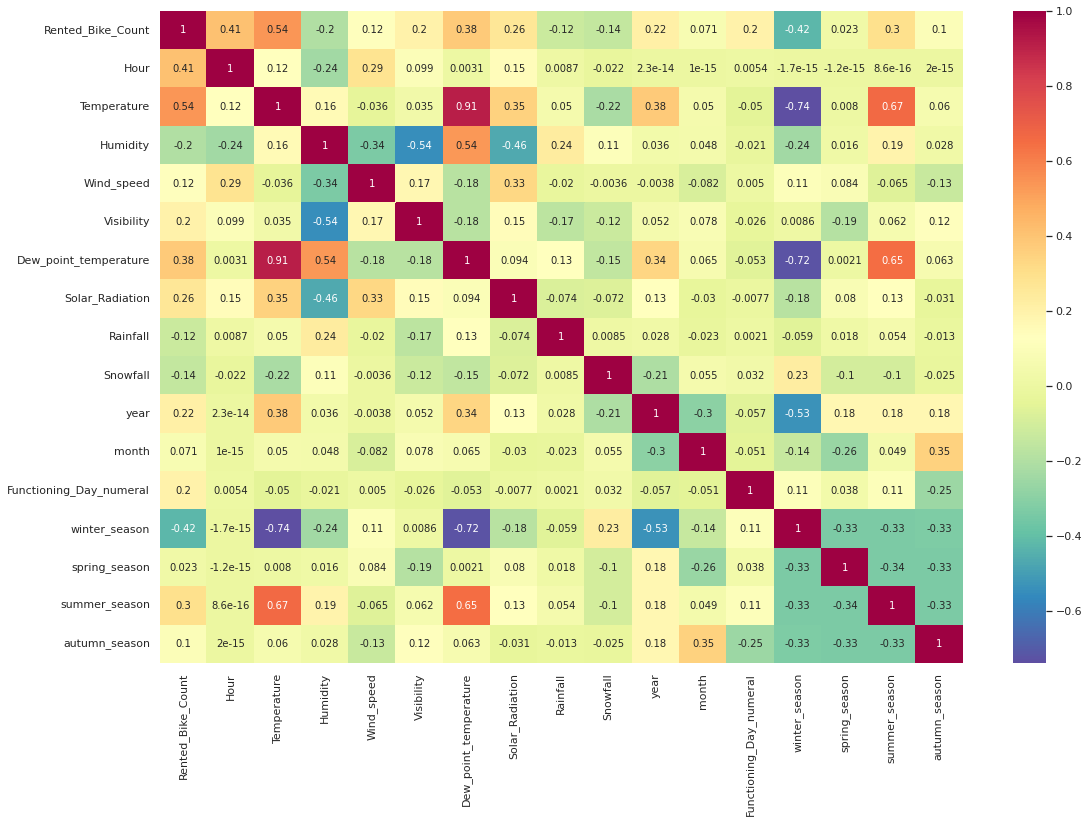

In [37]:
plt.figure(figsize=(18,12))
sns.heatmap(bike_df.corr(),annot= True, cmap='Spectral_r')

From heatmap, we can see that Temperature & Dew point temperature are strongly correlated, and both of these are correlated to Summer and winter as well.

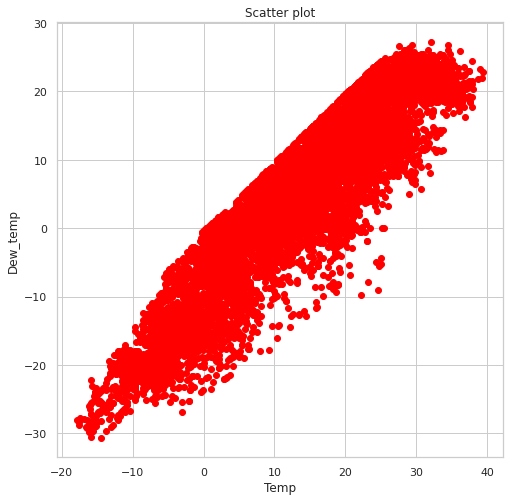

In [38]:
# Scatter plot between Profit and Marketing Spend

plt.figure(figsize=(8,8))
plt.scatter(bike_df['Temperature'], bike_df['Dew_point_temperature'], color='red')
plt.title('Scatter plot')
plt.xlabel('Temp')
plt.ylabel('Dew_temp')
plt.show()

Temperature and Dew point temperature are lineraly related to each other. Thus we will check VIF value for these two.